In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [2]:
#2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
BATCH_SIZE = 32
CHANNELS = 3

TRAIN_DIR = '/kaggle/input/brain-tumor-mri-dataset/Training'
TEST_DIR = '/kaggle/input/brain-tumor-mri-dataset/Testing'

# Veri Artırma ve Ön İşleme
# Eğitim verisi için veri artırma uygulayın
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

model = Sequential([
    Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, CHANNELS)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(train_generator.num_classes, activation='softmax') # Çıktı katmanı
])

# Modeli derle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Modeli eğit
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)

print("Model eğitimi tamamlandı.")

loss, accuracy = model.evaluate(test_generator)
print(f"Test verisi üzerinde kayıp (loss): {loss:.4f}")
print(f"Test verisi üzerinde doğruluk (accuracy): {accuracy:.4f}")

2025-09-25 12:19:25.018917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758802765.223284      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758802765.291217      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


I0000 00:00:1758802779.421836      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758802779.422498      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1758802784.261171     113 service.cc:148] XLA service 0x7f44dc003d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758802784.262428     113 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758802784.262449     113 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758802784.598366     113 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/179 ━━━━━━━━━━━━━━━━━━━━ 21:05 7s/step - accuracy: 0.3125 - loss: 1.3758

I0000 00:00:1758802788.559375     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 71s 359ms/step - accuracy: 0.4608 - loss: 1.2411 - val_accuracy: 0.7223 - val_loss: 0.8490
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 213ms/step - accuracy: 0.7412 - loss: 0.6641 - val_accuracy: 0.7620 - val_loss: 0.6336
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 218ms/step - accuracy: 0.7712 - loss: 0.5774 - val_accuracy: 0.6941 - val_loss: 0.9192
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 210ms/step - accuracy: 0.8222 - loss: 0.4794 - val_accuracy: 0.7841 - val_loss: 0.6022
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 210ms/step - accuracy: 0.8140 - loss: 0.4714 - val_accuracy: 0.7452 - val_loss: 0.7856
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 212ms/step - accuracy: 0.8422 - loss: 0.4218 - val_accuracy: 0.7643 - val_loss: 0.6722
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 212ms/step - accuracy: 0.8371 - loss: 0.4312 - val_accuracy: 0.7712 - val_loss: 0.6878
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 37s 208ms/step - accuracy: 0.8519 - loss: 0.3889 - val

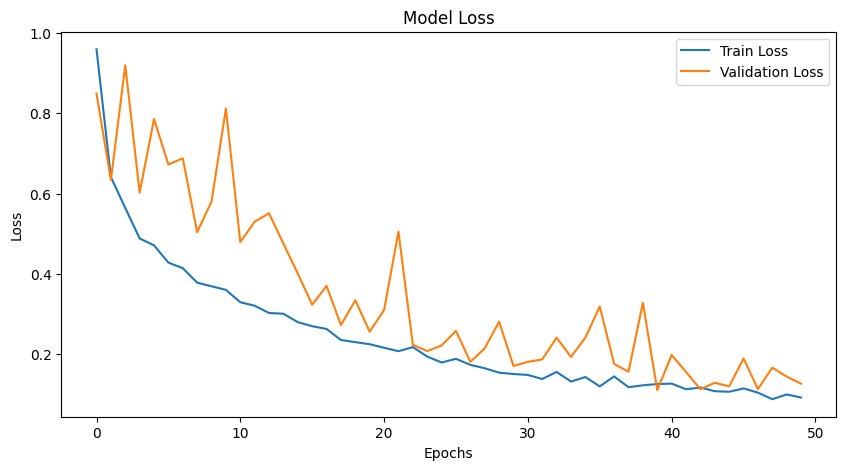

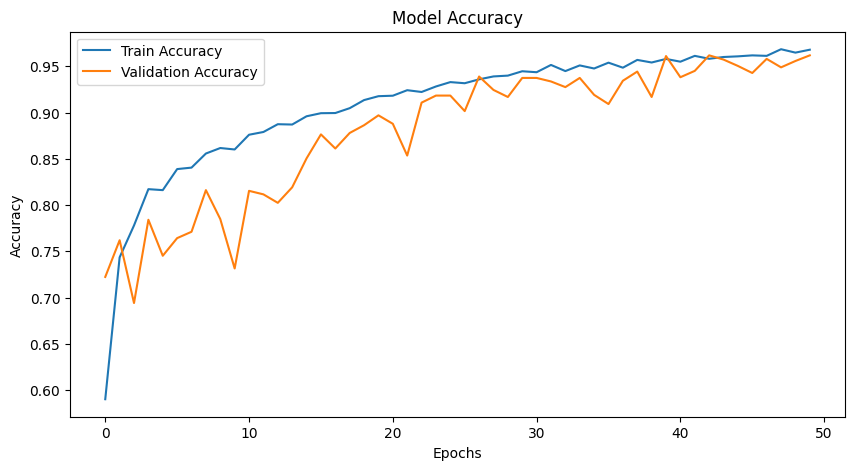

In [3]:
import matplotlib.pyplot as plt

# Loss grafiği
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy grafiği
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step


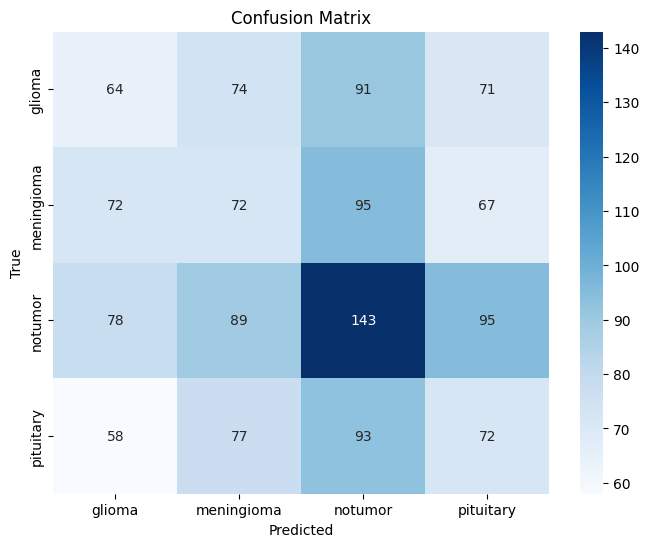

              precision    recall  f1-score   support

      glioma       0.24      0.21      0.22       300
  meningioma       0.23      0.24      0.23       306
     notumor       0.34      0.35      0.35       405
   pituitary       0.24      0.24      0.24       300

    accuracy                           0.27      1311
   macro avg       0.26      0.26      0.26      1311
weighted avg       0.27      0.27      0.27      1311



In [4]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Test setinde tahmin yap
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=list(test_generator.class_indices.keys()), 
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


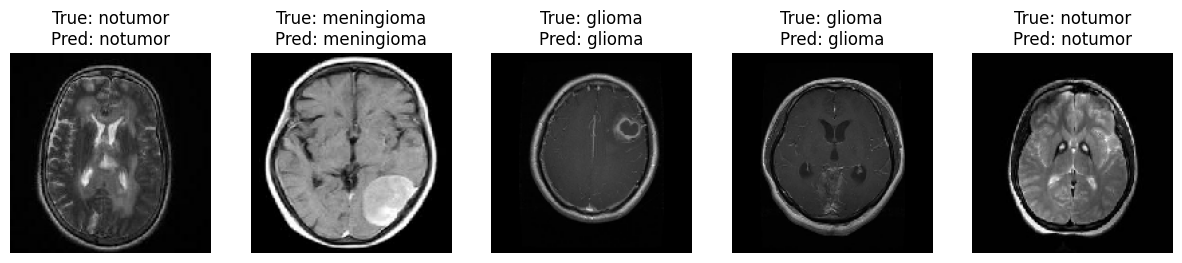

In [5]:
import random

# Test setinden birkaç örnek al
x, y = next(test_generator)
indices = random.sample(range(len(x)), 5)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    img = x[idx]
    true_label = np.argmax(y[idx])
    pred_label = np.argmax(model.predict(img[np.newaxis, ...]))
    
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {list(test_generator.class_indices.keys())[true_label]}\nPred: {list(test_generator.class_indices.keys())[pred_label]}")
plt.show()


In [6]:
model.save("brain_tumor_cnn_model.h5")
print("Model kaydedildi.")


Model kaydedildi.
